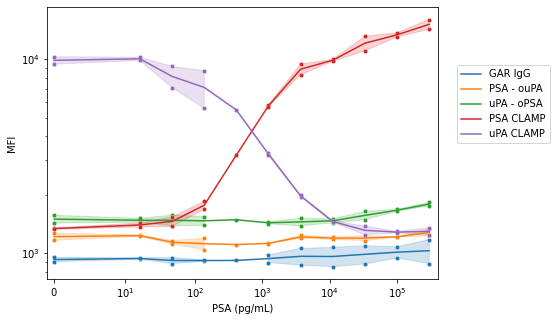

In [182]:
# supplementary figure mismatched clamp

import pandas as pd
import seaborn as sbn 
import matplotlib.pyplot as plt
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods'
figure_directory = '/Users/grantongo/Desktop/nature methods/figures'
df = pd.read_csv(f'{root}/data/mismatched clamp/uPA_PSA_half_clamp.csv')

df_melt = df.melt(id_vars=['sample', 'sample_type', 'replicate', 'uPA dilution point', 'uPA (pg/mL)','PSA dilution point', 'PSA (pg/mL)'])

fig, ax = plt.subplots(1,1,figsize=(7,5))

for clamp in df_melt['variable'].unique():
    ax = sbn.lineplot(data=df_melt[(df_melt['variable']==clamp) & 
                                   (df_melt['sample_type']=='ratio')],
                     x='PSA (pg/mL)',
                     y='value',
                     #errorbar=None,
                     #err_style="bars",
                     label=clamp
                     )
    ax = sbn.scatterplot(data=df_melt[(df_melt['variable']==clamp) & 
                                   (df_melt['sample_type']=='ratio')],
                     x='PSA (pg/mL)',
                     y='value',
                     s=20
                     )
ax.legend(loc=[1.05,0.5])
ax.set_yscale('log')
ax.set_xscale('symlog', base=10, linthresh=10.5)
ax.set_xlim(-1,400000)
ax.set_ylabel('MFI')

fig.savefig(f"{figure_directory}/figure si/mismatched_clamp_{formatted_date}.svg")